<a href="https://colab.research.google.com/github/Rayan786-12/Rayan-24bce1002-_ai_recruitment_task/blob/main/Rayan(24bce1002)_ai_recruitment_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy

# IMDb Movie Review Sentiment Analysis
**Author:** Rayan Ahmed  
**Batch:** 2024  

**Task:** AIML Recruitment Task


In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("IMDB Dataset.csv")

In [4]:
df=pd.read_csv("IMDB Dataset.csv")

In [5]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
df['sentiment']

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive
...,...
49995,positive
49996,negative
49997,negative
49998,negative


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [11]:
df = pd.read_csv("IMDB Dataset.csv")

In [12]:

print(df.shape)
print(df.info())


print(df['sentiment'].value_counts())


(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


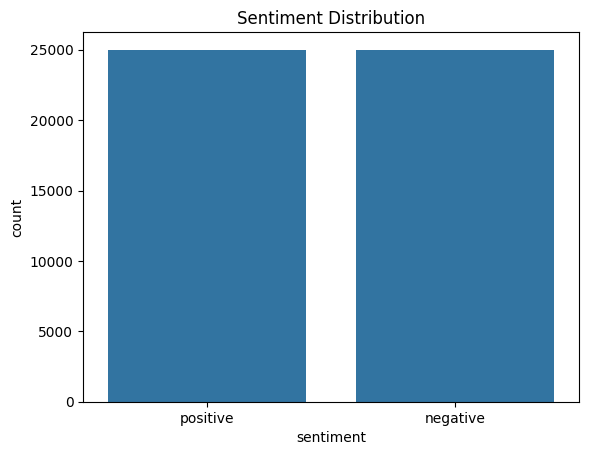

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [14]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
print(df['review_length'].describe())

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


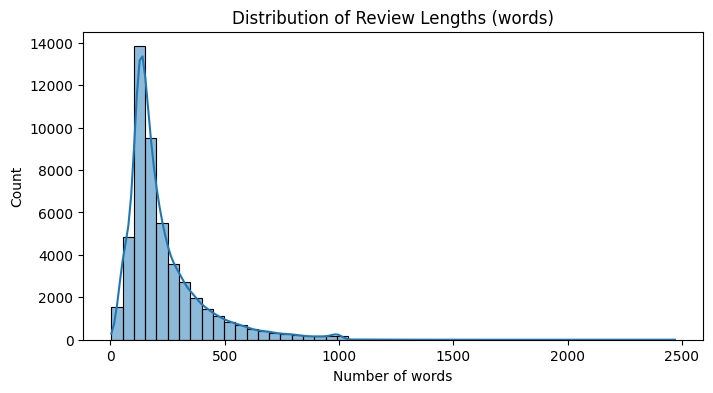

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths (words)")
plt.xlabel("Number of words")
plt.show()

In [16]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from gensim.models import Word2Vec

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (50000, 3)
                                              review sentiment  review_length
0  One of the other reviewers has mentioned that ...  positive            307
1  A wonderful little production. <br /><br />The...  positive            162
2  I thought this was a wonderful way to spend ti...  positive            166
3  Basically there's a family where a little boy ...  negative            138
4  Petter Mattei's "Love in the Time of Money" is...  positive            230


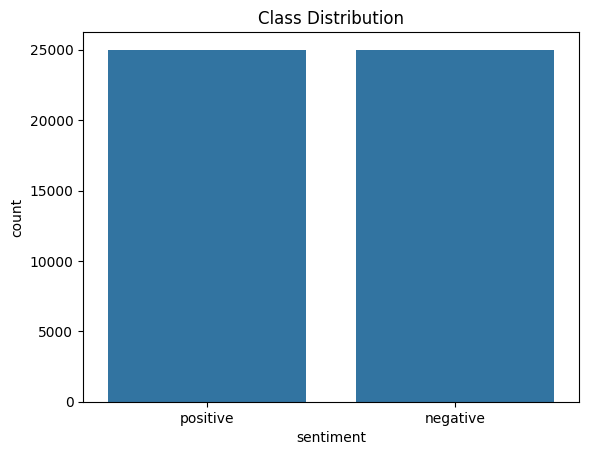

In [18]:
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution')
plt.show()

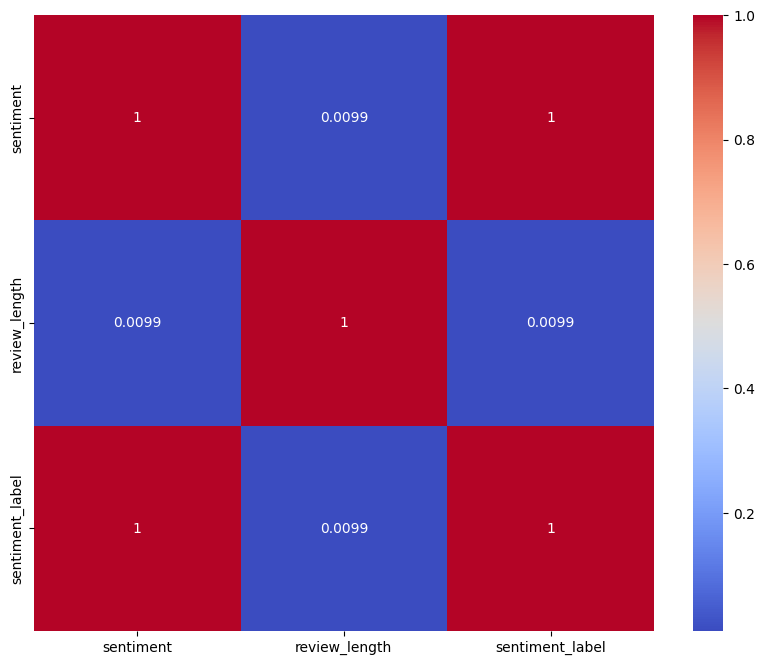

In [74]:

numeric_df = df.select_dtypes(include=np.number)

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


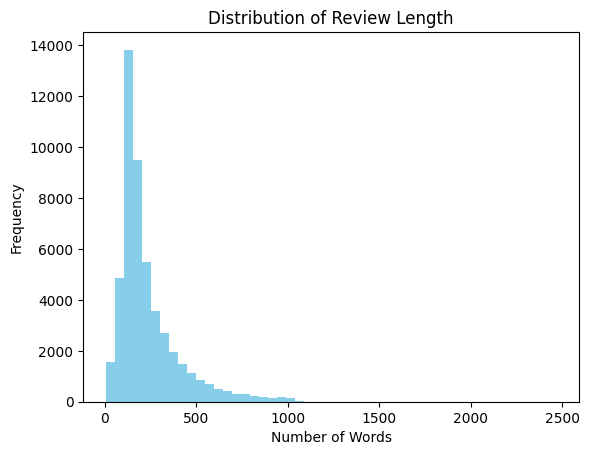

In [19]:
print(df['sentiment'].value_counts())

# Review length analysis
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
plt.hist(df['review_length'], bins=50, color='skyblue')
plt.title('Distribution of Review Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [20]:
print("Average review length:", df['review_length'].mean())

Average review length: 231.15694


In [21]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

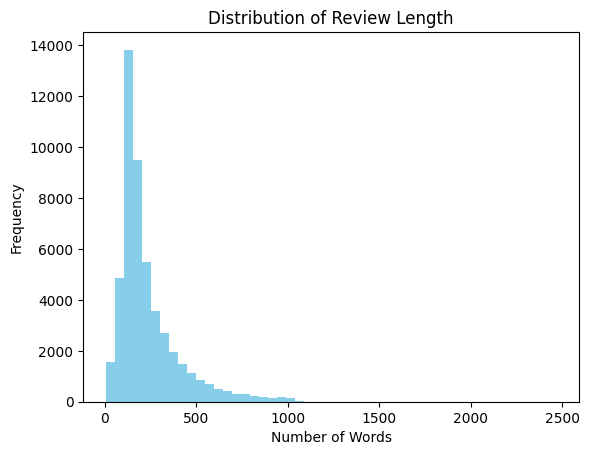

In [22]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
plt.hist(df['review_length'], bins=50, color='skyblue')
plt.title('Distribution of Review Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [23]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & numbers
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [24]:
df

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
...,...,...,...
49995,I thought this movie did a down right good job...,positive,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112
49997,I am a Catholic taught in parochial elementary...,negative,230
49998,I'm going to have to disagree with the previou...,negative,212


In [25]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])  # positive=1, negative=0
# y = df['sentiment']
# X = df['clean_review']


In [28]:
df

,review,sentiment,review_length,clean_review
0,One of the other reviewers has mentioned that ...,1,307,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,1,162,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,166,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,138,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,petter matteis love time money visually stunni...
...,...,...,...,...
49995,I thought this movie did a down right good job...,1,194,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,230,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,0,212,im going disagree previous comment side maltin...


In [29]:
import nltk
nltk.download('punkt_tab')
df['clean_review'] = df['review'].apply(preprocess_text)
print(df['clean_review'].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    one reviewer mentioned watching oz episode you...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: clean_review, dtype: object


In [30]:
import nltk

# Download required NLTK resources
nltk.download('punkt')       # For tokenization
nltk.download('stopwords')   # For stopwords
nltk.download('wordnet')     # For lemmatization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
df

,review,sentiment,review_length,clean_review
0,One of the other reviewers has mentioned that ...,1,307,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,1,162,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,166,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,138,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,petter matteis love time money visually stunni...
...,...,...,...,...
49995,I thought this movie did a down right good job...,1,194,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,230,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,0,212,im going disagree previous comment side maltin...


In [32]:
# y = df['sentiment_label']
# X = df['clean_review']
le = LabelEncoder()
df['sentiment_label'] = le.fit_transform(df['sentiment']) # positive=1, negative=0 y = df['sentiment_label'] X = df['clean_review']

In [33]:
y = df['sentiment_label']
X = df['clean_review']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
vectorizer_bow = CountVectorizer(max_features=5000)
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

In [36]:
vectorizer_tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [37]:
X_train_tokens = [nltk.word_tokenize(text) for text in X_train]
X_test_tokens = [nltk.word_tokenize(text) for text in X_test]

w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=2, workers=4, seed=42)

In [38]:
def avg_word2vec(tokens, model, vector_size):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

In [39]:
X_train_w2v = np.array([avg_word2vec(tokens, w2v_model, 100) for tokens in X_train_tokens])
X_test_w2v = np.array([avg_word2vec(tokens, w2v_model, 100) for tokens in X_test_tokens])


In [40]:
lr_bow = LogisticRegression(max_iter=500)
lr_bow.fit(X_train_bow, y_train)
y_pred_bow = lr_bow.predict(X_test_bow)

In [41]:
lr_tfidf = LogisticRegression(max_iter=500)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

In [42]:
subset_size = 8000
X_train_subset = X_train_w2v[:subset_size]
y_train_subset = y_train[:subset_size]

In [43]:

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_subset, y_train_subset)  # GridSearch on subset
best_rf = grid.best_estimator_


In [44]:
best_rf

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [45]:
best_rf.fit(X_train_w2v, y_train)
y_pred_rf = best_rf.predict(X_test_w2v)

In [46]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


--- Logistic Regression (BoW) ---
Accuracy: 0.8725
Precision: 0.8684
Recall: 0.8780
F1-score: 0.8732


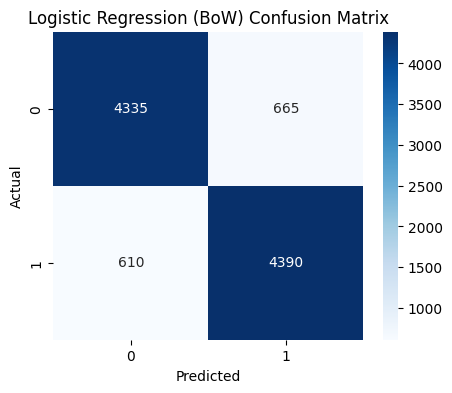


--- Logistic Regression (TF-IDF) ---
Accuracy: 0.8857
Precision: 0.8784
Recall: 0.8954
F1-score: 0.8868


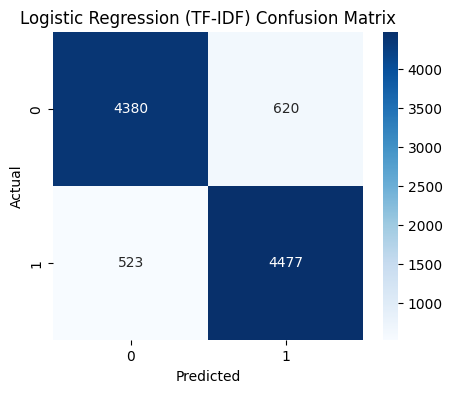


--- Random Forest (Avg Word2Vec + GridSearchCV) ---
Accuracy: 0.8327
Precision: 0.8203
Recall: 0.8520
F1-score: 0.8359


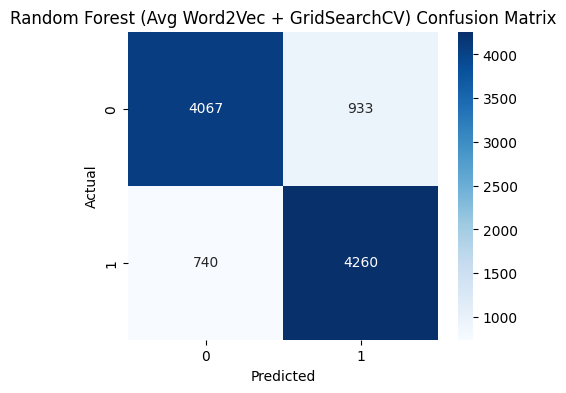

In [47]:
evaluate_model(y_test, y_pred_bow, "Logistic Regression (BoW)")
evaluate_model(y_test, y_pred_tfidf, "Logistic Regression (TF-IDF)")
evaluate_model(y_test, y_pred_rf, "Random Forest (Avg Word2Vec + GridSearchCV)")


--- LinearSVC (TF-IDF) ---
Accuracy: 0.8798
Precision: 0.8759
Recall: 0.8850
F1-score: 0.8804


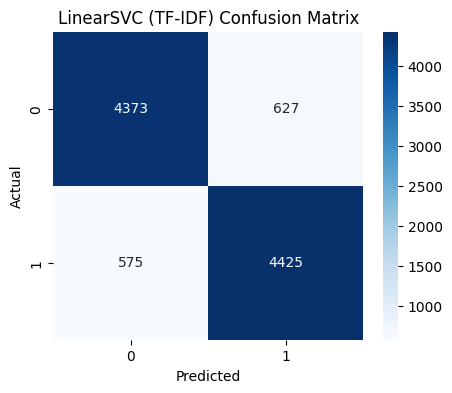

In [48]:
from sklearn.svm import LinearSVC

# Faster Linear SVM for text data
linear_svm = LinearSVC(random_state=42, max_iter=5000)
linear_svm.fit(X_train_tfidf, y_train)
y_pred_linear_svm = linear_svm.predict(X_test_tfidf)

# Evaluate
evaluate_model(y_test, y_pred_linear_svm, "LinearSVC (TF-IDF)")


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- 1. TF-IDF Vectorization with n-grams and sublinear TF ---
tfidf = TfidfVectorizer(
    max_features=30000,      # more features to capture vocabulary
    ngram_range=(1,2),       # unigrams + bigrams
    stop_words='english',    # remove common stopwords
    sublinear_tf=True        # scale tf logarithmically
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --- 2. Linear SVM ---
linear_svm = LinearSVC(C=1.0, random_state=42, max_iter=5000)
linear_svm.fit(X_train_tfidf, y_train)
y_pred = linear_svm.predict(X_test_tfidf)

# --- 3. Evaluation ---
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred, pos_label=1), 4))
    print("Recall:", round(recall_score(y_true, y_pred, pos_label=1), 4))
    print("F1-score:", round(f1_score(y_true, y_pred, pos_label=1), 4))

evaluate_model(y_test, y_pred, "LinearSVC (Optimized TF-IDF)")

--- LinearSVC (Optimized TF-IDF) ---
Accuracy: 0.898
Precision: 0.8931
Recall: 0.9042
F1-score: 0.8986


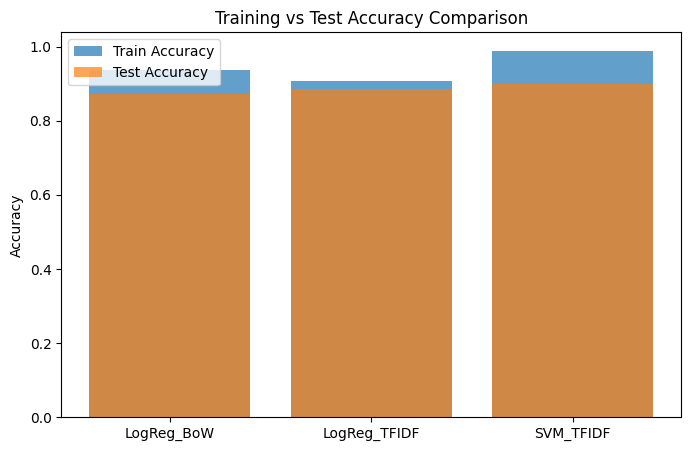

In [53]:
import matplotlib.pyplot as plt

models = {
    "LogReg_BoW": lr_bow,
    "LogReg_TFIDF": lr_tfidf,
    "SVM_TFIDF": linear_svm, # Use the trained LinearSVC model
}

train_acc = []
test_acc = []

for name, model in models.items():
    if name == "LogReg_BoW":
        X_tr, X_te = X_train_bow, X_test_bow
    elif name == "LogReg_TFIDF": # Use the X_test_tfidf from the 5000 feature vectorizer
         X_tr = vectorizer_tfidf.transform(X_train)
         X_te = vectorizer_tfidf.transform(X_test)
    else: # For SVM_TFIDF, use the X_test_tfidf from the 30000 feature vectorizer
        X_tr, X_te = X_train_tfidf, X_test_tfidf # This X_train_tfidf and X_test_tfidf is from cell C16_eRaNbuch with max_features=30000


    train_acc.append(model.score(X_tr, y_train))
    test_acc.append(model.score(X_te, y_test))


plt.figure(figsize=(8,5))
plt.bar(models.keys(), train_acc, alpha=0.7, label="Train Accuracy")
plt.bar(models.keys(), test_acc, alpha=0.7, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy Comparison")
plt.legend()
plt.show()

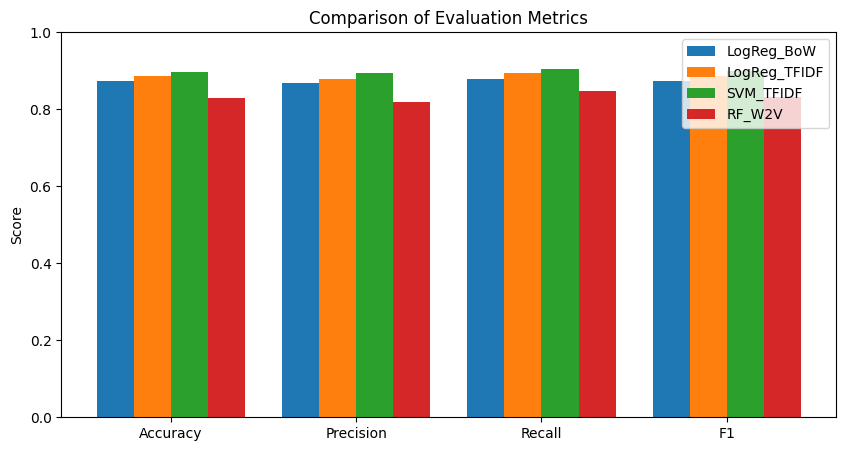

In [54]:
metrics = ["Accuracy", "Precision", "Recall", "F1"]
model_results = {
    "LogReg_BoW": [0.8725, 0.8684, 0.8780, 0.8732],
    "LogReg_TFIDF": [0.8857, 0.8784, 0.8954, 0.8868],
    "SVM_TFIDF": [0.8980, 0.8931, 0.9042, 0.8986],
    "RF_W2V": [0.8303, 0.8200, 0.8464, 0.8330],
}

import numpy as np

x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(10,5))
for i, (model, values) in enumerate(model_results.items()):
    plt.bar(x + i*width, values, width, label=model)

plt.xticks(x + width*1.5, metrics)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Comparison of Evaluation Metrics")
plt.legend()
plt.show()


In [55]:
from sklearn.naive_bayes import MultinomialNB

# BoW features
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_nb_bow = nb_bow.predict(X_test_bow)
evaluate_model(y_test, y_pred_nb_bow, "Naive Bayes (BoW)")


--- Naive Bayes (BoW) ---
Accuracy: 0.8436
Precision: 0.8462
Recall: 0.8398
F1-score: 0.843


In [57]:
from sklearn.naive_bayes import GaussianNB

nb_w2v = GaussianNB()
nb_w2v.fit(X_train_w2v, y_train)
y_pred_nb_w2v = nb_w2v.predict(X_test_w2v)
evaluate_model(y_test, y_pred_nb_w2v, "Naive Bayes (Avg Word2Vec)")


--- Naive Bayes (Avg Word2Vec) ---
Accuracy: 0.7611
Precision: 0.7583
Recall: 0.7666
F1-score: 0.7624


In [56]:
# TF-IDF features
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
evaluate_model(y_test, y_pred_nb_tfidf, "Naive Bayes (TF-IDF)")


--- Naive Bayes (TF-IDF) ---
Accuracy: 0.8723
Precision: 0.8646
Recall: 0.8828
F1-score: 0.8736


In [63]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[i])
               for i, doc in enumerate(X_train)]

doc2vec_model = Doc2Vec(
    vector_size=50,
    window=3,
    min_count=2,
    workers=4,
    epochs=10,
    dm=1,
    seed=42
)

doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Infer vectors
X_train_doc2vec = np.array([doc2vec_model.infer_vector(word_tokenize(doc.lower())) for doc in X_train])
X_test_doc2vec = np.array([doc2vec_model.infer_vector(word_tokenize(doc.lower())) for doc in X_test])



In [66]:
from sklearn.naive_bayes import GaussianNB

nb_doc2vec = GaussianNB()
nb_doc2vec.fit(X_train_doc2vec, y_train)
y_pred_nb_doc2vec = nb_doc2vec.predict(X_test_doc2vec)
evaluate_model(y_test, y_pred_nb_doc2vec, "Naive Bayes (Doc2Vec)")

--- Naive Bayes (Doc2Vec) ---
Accuracy: 0.7218
Precision: 0.7863
Recall: 0.6092
F1-score: 0.6865


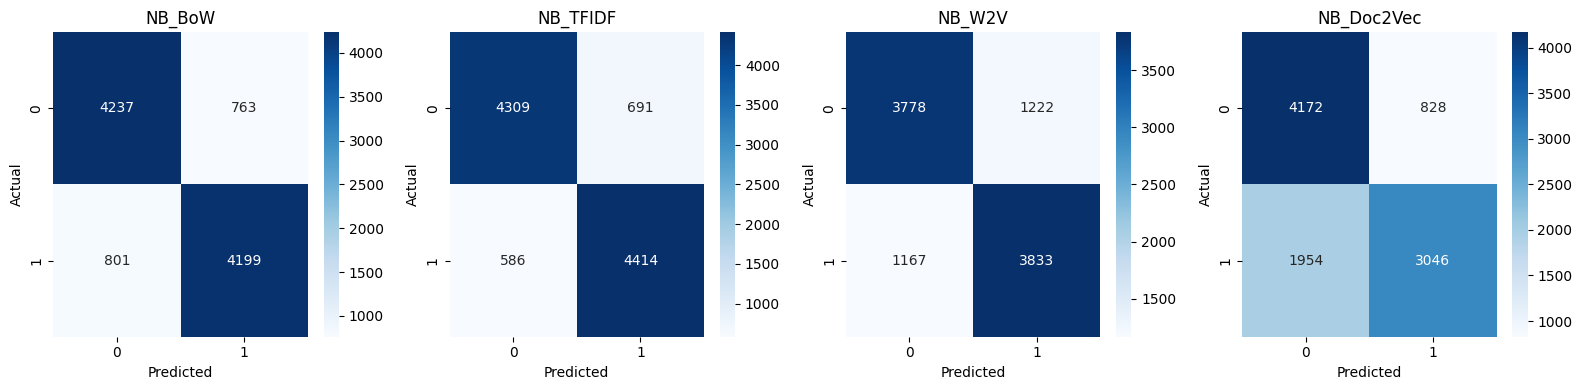

In [67]:
models_preds = {
    "NB_BoW": y_pred_nb_bow,
    "NB_TFIDF": y_pred_nb_tfidf,
    "NB_W2V": y_pred_nb_w2v,
    "NB_Doc2Vec": y_pred_nb_doc2vec
}

plt.figure(figsize=(16,4))
for i, (name, y_pred) in enumerate(models_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 4, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()


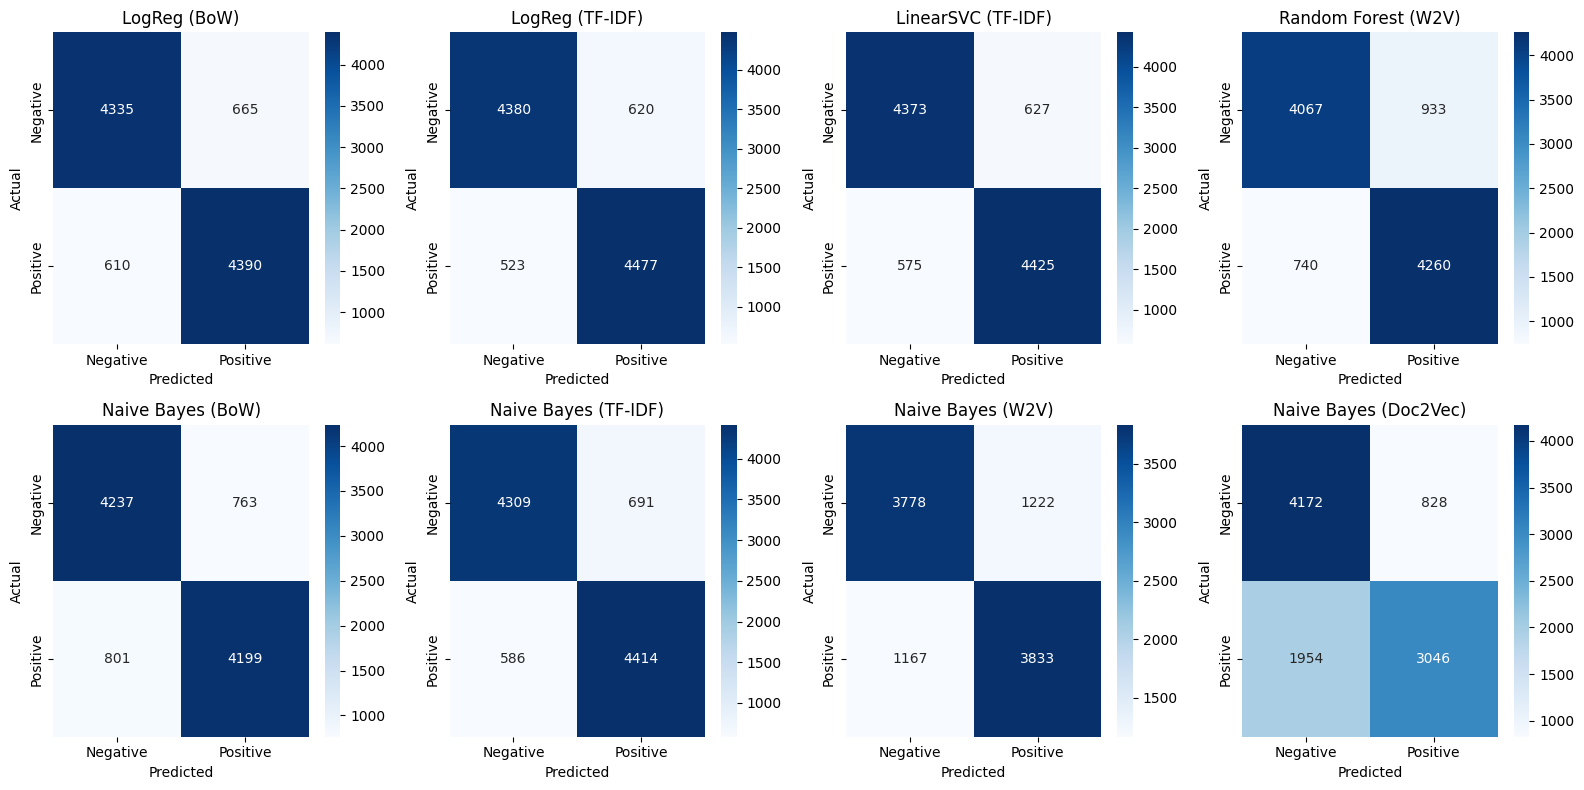

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dictionary of model predictions
models = {
    "LogReg (BoW)": y_pred_bow,
    "LogReg (TF-IDF)": y_pred_tfidf,
    "LinearSVC (TF-IDF)": y_pred_linear_svm,
    "Random Forest (W2V)": y_pred_rf,
    "Naive Bayes (BoW)": y_pred_nb_bow,
    "Naive Bayes (TF-IDF)": y_pred_nb_tfidf,
    "Naive Bayes (W2V)": y_pred_nb_w2v,
    "Naive Bayes (Doc2Vec)": y_pred_nb_doc2vec
}

# Determine the layout of subplots
n_models = len(models)
n_cols = 4 # Number of columns for the subplots
n_rows = (n_models + n_cols - 1) // n_cols # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plotting heatmaps for all models
for i, (name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Negative", "Positive"],
                yticklabels=["Negative", "Positive"], ax=axes[i])
    axes[i].set_title(f"{name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

In [71]:
from sklearn.metrics import classification_report

# Assuming you already have your models trained and predictions done:
# y_pred_lr, y_pred_svm, y_pred_rf, y_pred_xgb
# and y_test is your test labels

models_preds = {
    "Logistic Regression (BoW)": y_pred_bow,
    "Logistic Regression (TF-IDF)": y_pred_tfidf,
    "Linear SVM (TF-IDF)": y_pred_linear_svm,
    "Random Forest (W2V)": y_pred_rf,
    "Naive Bayes (BoW)": y_pred_nb_bow,
    "Naive Bayes (TF-IDF)": y_pred_nb_tfidf,
    "Naive Bayes (W2V)": y_pred_nb_w2v,
    "Naive Bayes (Doc2Vec)": y_pred_nb_doc2vec
}

for name, y_pred in models_preds.items():
    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred, digits=4))


===== Logistic Regression (BoW) =====
              precision    recall  f1-score   support

           0     0.8766    0.8670    0.8718      5000
           1     0.8684    0.8780    0.8732      5000

    accuracy                         0.8725     10000
   macro avg     0.8725    0.8725    0.8725     10000
weighted avg     0.8725    0.8725    0.8725     10000


===== Logistic Regression (TF-IDF) =====
              precision    recall  f1-score   support

           0     0.8933    0.8760    0.8846      5000
           1     0.8784    0.8954    0.8868      5000

    accuracy                         0.8857     10000
   macro avg     0.8858    0.8857    0.8857     10000
weighted avg     0.8858    0.8857    0.8857     10000


===== Linear SVM (TF-IDF) =====
              precision    recall  f1-score   support

           0     0.8838    0.8746    0.8792      5000
           1     0.8759    0.8850    0.8804      5000

    accuracy                         0.8798     10000
   macro avg  

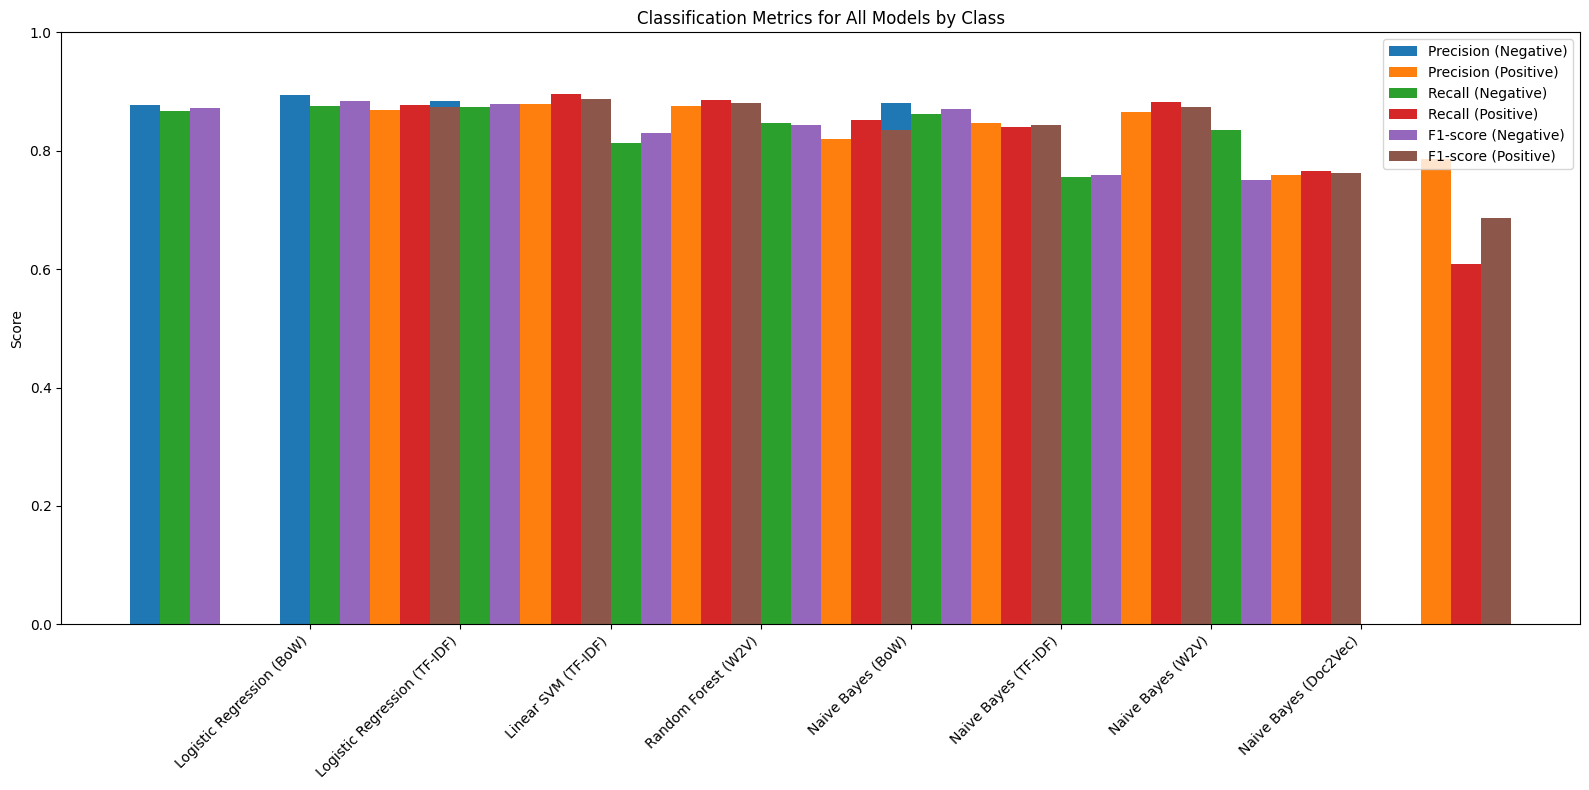

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Assume these are your predictions
models = {
    "Logistic Regression (BoW)": y_pred_bow,
    "Logistic Regression (TF-IDF)": y_pred_tfidf,
    "Linear SVM (TF-IDF)": y_pred_linear_svm,
    "Random Forest (W2V)": y_pred_rf,
    "Naive Bayes (BoW)": y_pred_nb_bow,
    "Naive Bayes (TF-IDF)": y_pred_nb_tfidf,
    "Naive Bayes (W2V)": y_pred_nb_w2v,
    "Naive Bayes (Doc2Vec)": y_pred_nb_doc2vec
}

# Prepare a DataFrame to hold metrics
metrics_data = []

for name, y_pred in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    # Extract metrics for class 0 (negative) and class 1 (positive)
    metrics_data.append({
        'Model': name,
        'Class': 'Negative',
        'Precision': report['0']['precision'],
        'Recall': report['0']['recall'],
        'F1-score': report['0']['f1-score']
    })
    metrics_data.append({
        'Model': name,
        'Class': 'Positive',
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-score': report['1']['f1-score']
    })

metrics_df = pd.DataFrame(metrics_data)

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(16, 8))

bar_width = 0.2
models_count = len(models)
classes = ['Negative', 'Positive']
metrics = ['Precision', 'Recall', 'F1-score']

x = range(models_count)

for i, metric in enumerate(metrics):
    for j, cls in enumerate(classes):
        subset_df = metrics_df[(metrics_df['Class'] == cls)]
        metric_values = subset_df[metric].tolist()
        # Adjust position for each bar group
        pos = [p + (i * bar_width) + (j * models_count * bar_width) for p in x]
        ax.bar(pos, metric_values, bar_width, label=f'{metric} ({cls})')


ax.set_ylabel("Score")
ax.set_title("Classification Metrics for All Models by Class")
ax.set_xticks([p + bar_width * (len(metrics)/2 + models_count/2) for p in x])
ax.set_xticklabels(models.keys(), rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [11]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib